In [1]:
import geopandas as gpd
import pandas as pd
import math
from shapely.geometry import Point, LineString, Polygon
from shapely import line_interpolate_point
import contextily as ctx
ctx.set_cache_dir("contextily_cache")
pd.set_option("display.max_columns", None)

In [2]:
bruun = gpd.read_file("https://github.com/eduardogomezdelapena/OCC_Retreat_Modelling/raw/refs/heads/main/retreat_8.5_2100_50percentile.geojson")

In [3]:
bruun

,nzrise_lon,nzrise_lat,lon,lat,distance_km,site_ID_nzrise,beach_slope,coastsat_id,trend,Confidence,year,17,50,83,SSP,scenario,retreat_17,retreat_50,retreat_83,geometry
0,173.117510,-34.740926,172.963674,-34.429108,37.423423,0,0.050,nzd0001-0000,-0.018229,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,13.020000,16.660000,22.000000,POINT (172.96367 -34.42911)
1,173.117510,-34.740926,172.964573,-34.429096,37.393842,0,NaN,nzd0001-0001,-0.202478,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,NaN,NaN,NaN,POINT (172.96457 -34.4291)
2,173.117510,-34.740926,172.965471,-34.429083,37.364419,0,0.060,nzd0001-0002,-0.310207,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,10.850000,13.883333,18.333333,POINT (172.96547 -34.42908)
3,173.117510,-34.740926,172.966369,-34.429071,37.335154,0,NaN,nzd0001-0003,-0.348651,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,NaN,NaN,NaN,POINT (172.96637 -34.42907)
4,173.117510,-34.740926,172.967267,-34.429058,37.306047,0,0.055,nzd0001-0004,-0.416870,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,11.836364,15.145455,20.000000,POINT (172.96727 -34.42906)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32352,174.915458,-36.874669,174.909298,-36.869511,0.793193,1297,0.055,nzd0562-0017,0.075916,medium_confidence,2100,0.646,0.821,1.078,ssp5,8.5,11.745455,14.927273,19.600000,POINT (174.9093 -36.86951)
32353,174.901489,-36.865512,174.908915,-36.868893,0.760079,1294,0.045,nzd0562-0018,0.375650,medium_confidence,2100,0.646,0.821,1.078,ssp5,8.5,14.355556,18.244444,23.955556,POINT (174.90891 -36.86889)
32354,176.938123,-39.336334,176.937404,-39.334496,0.213500,2254,0.200,nzd0563-0000,-0.278453,medium_confidence,2100,0.640,0.812,1.065,ssp5,8.5,3.200000,4.060000,5.325000,POINT (176.9374 -39.3345)
32355,176.938123,-39.336334,176.936485,-39.334588,0.239862,2254,0.050,nzd0563-0001,-0.077043,medium_confidence,2100,0.640,0.812,1.065,ssp5,8.5,12.800000,16.240000,21.300000,POINT (176.93648 -39.33459)


In [4]:
bruun.describe()

,nzrise_lon,nzrise_lat,lon,lat,distance_km,site_ID_nzrise,beach_slope,trend,year,17,50,83,scenario,retreat_17,retreat_50,retreat_83
count,32357.000000,32357.000000,32357.000000,32357.000000,32357.000000,32357.000000,29327.000000,32357.000000,32357.0,32357.000000,32357.000000,32357.000000,32357.0,29327.000000,29327.000000,29327.000000
mean,173.288059,-40.610773,173.283250,-40.603548,1.500902,3746.486232,0.063577,0.123176,2100.0,0.647496,0.814448,1.062443,8.5,12.950967,16.301959,21.284428
std,2.683989,3.545515,2.684141,3.556204,5.231279,1742.556485,0.032901,1.887195,0.0,0.008299,0.010268,0.020458,0.0,6.473222,8.164166,10.685302
min,166.711820,-46.781991,166.721379,-46.777952,0.008148,0.000000,0.010000,-40.158498,2100.0,0.623000,0.786000,1.021000,8.5,3.200000,4.060000,5.325000
25%,171.206945,-43.541464,171.208843,-43.544921,0.413565,2283.000000,0.040000,-0.391224,2100.0,0.642000,0.808000,1.046000,8.5,8.100000,10.150000,13.312500
50%,173.394657,-40.849992,173.392853,-40.848381,0.593501,4124.000000,0.055000,0.078621,2100.0,0.650000,0.814000,1.065000,8.5,11.800000,14.763636,19.345455
75%,175.093294,-37.658404,175.097424,-37.660893,0.819408,4875.000000,0.080000,0.578361,2100.0,0.654000,0.821000,1.074000,8.5,16.350000,20.525000,26.825000
max,178.540946,-34.740926,178.534895,-34.417652,50.748430,8097.000000,0.200000,29.201280,2100.0,0.667000,0.838000,1.101000,8.5,65.600000,83.300000,110.000000


In [5]:
transects = gpd.read_file("https://uoa-eresearch.github.io/CoastSat/transects_extended.geojson")
transects = transects[transects.site_id.str.startswith("nzd")]
transects = transects.sjoin_nearest(bruun)
transects

/home/ubuntu/.local/lib/python3.12/site-packages/geopandas/array.py:417: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,id,site_id,orientation,along_dist,along_dist_norm,beach_slope_left,cil,ciu,trend_left,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry,index_right,nzrise_lon,nzrise_lat,lon,lat,distance_km,site_ID_nzrise,beach_slope_right,coastsat_id,trend_right,Confidence,year,17,50,83,SSP,scenario,retreat_17,retreat_50,retreat_83
95050,nzd0001-0000,nzd0001,359.037136,3197.737936,1.000000,0.050,0.0397,0.0679,-0.033561,192.0,150.0,0.000116,19.378292,564.287741,23.754741,324.382577,None,"LINESTRING (172.96367 -34.42911, 172.96351 -34...",0,173.117510,-34.740926,172.963674,-34.429108,37.423423,0,0.050,nzd0001-0000,-0.018229,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,13.020000,16.660000,22.000000
95051,nzd0001-0001,nzd0001,359.037136,3097.737936,0.968728,NaN,NaN,NaN,-0.189013,192.0,164.0,0.004390,17.677898,485.232625,22.027996,329.291568,None,"LINESTRING (172.96457 -34.4291, 172.9644 -34.4...",1,173.117510,-34.740926,172.964573,-34.429096,37.393842,0,NaN,nzd0001-0001,-0.202478,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,NaN,NaN,NaN
95052,nzd0001-0002,nzd0001,359.037136,2997.737936,0.937456,0.060,0.0478,0.0776,-0.296217,192.0,167.0,0.013703,15.899333,373.360050,19.322527,335.476387,None,"LINESTRING (172.96547 -34.42908, 172.9653 -34....",2,173.117510,-34.740926,172.965471,-34.429083,37.364419,0,0.060,nzd0001-0002,-0.310207,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,10.850000,13.883333,18.333333
95053,nzd0001-0003,nzd0001,359.037136,2897.737936,0.906184,NaN,NaN,NaN,-0.340134,192.0,169.0,0.022694,14.289704,300.155688,17.325002,344.001603,None,"LINESTRING (172.96637 -34.42907, 172.9662 -34....",3,173.117510,-34.740926,172.966369,-34.429071,37.335154,0,NaN,nzd0001-0003,-0.348651,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,NaN,NaN,NaN
95054,nzd0001-0004,nzd0001,359.037136,2797.737936,0.874912,0.055,0.0450,0.0664,-0.403451,192.0,170.0,0.034879,13.361661,276.507598,16.628518,356.446732,None,"LINESTRING (172.96727 -34.42906, 172.9671 -34....",4,173.117510,-34.740926,172.967267,-34.429058,37.306047,0,0.055,nzd0001-0004,-0.416870,medium_confidence,2100,0.651,0.833,1.100,ssp5,8.5,11.836364,15.145455,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127424,nzd0562-0017,nzd0562,NaN,NaN,NaN,0.055,0.0541,0.0608,0.070916,608.0,430.0,0.001864,8.524311,151.709464,12.317040,211.679055,None,"LINESTRING (174.9093 -36.86951, 174.91331 -36....",32352,174.915458,-36.874669,174.909298,-36.869511,0.793193,1297,0.055,nzd0562-0017,0.075916,medium_confidence,2100,0.646,0.821,1.078,ssp5,8.5,11.745455,14.927273,19.600000
127425,nzd0562-0018,nzd0562,NaN,NaN,NaN,0.045,0.0434,0.0461,0.367123,608.0,393.0,0.030900,10.462270,239.391178,15.472271,215.700851,None,"LINESTRING (174.90891 -36.86889, 174.91293 -36...",32353,174.901489,-36.865512,174.908915,-36.868893,0.760079,1294,0.045,nzd0562-0018,0.375650,medium_confidence,2100,0.646,0.821,1.078,ssp5,8.5,14.355556,18.244444,23.955556
127426,nzd0563-0000,nzd0563,NaN,NaN,NaN,0.200,0.1756,0.2000,-0.284759,797.0,711.0,0.021821,12.868904,211.009202,14.526156,182.907128,None,"LINESTRING (176.9374 -39.3345, 176.938 -39.33807)",32354,176.938123,-39.336334,176.937404,-39.334496,0.213500,2254,0.200,nzd0563-0000,-0.278453,medium_confidence,2100,0.640,0.812,1.065,ssp5,8.5,3.200000,4.060000,5.325000
127427,nzd0563-0001,nzd0563,NaN,NaN,NaN,0.050,0.0323,0.1200,-0.073265,797.0,639.0,0.003390,8.452055,94.358949,9.713853,437.085121,None,"LINESTRING (176.93648 -39.33459, 176.93708 -39...",32355,176.938123,-39.336334,176.936485,-39.334588,0.239862,2254,0.050,nzd0563-0001,-0.077043,medium_confidence,2100,0.640,0.812,1.065,ssp5,8.5,12.800000,16.240000,21.300000


In [6]:
transects[transects.retreat_50 == transects.retreat_50.max()]

,id,site_id,orientation,along_dist,along_dist_norm,beach_slope_left,cil,ciu,trend_left,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry,index_right,nzrise_lon,nzrise_lat,lon,lat,distance_km,site_ID_nzrise,beach_slope_right,coastsat_id,trend_right,Confidence,year,17,50,83,SSP,scenario,retreat_17,retreat_50,retreat_83
96009,nzd0014-0001,nzd0014,77.008749,98.306597,1.0,0.01,0.01,0.0103,-1.78939,218.0,99.0,0.139281,27.960558,1186.408378,34.444279,444.179897,None,"LINESTRING (173.08873 -34.72602, 173.09862 -34...",959,173.11751,-34.740926,173.088732,-34.726021,3.10847,0,0.01,nzd0014-0001,-1.702979,medium_confidence,2100,0.651,0.833,1.1,ssp5,8.5,65.1,83.3,110.0


In [7]:
site_id = "nzd0014"
site = transects[transects.site_id == site_id]
site.set_index("id", inplace=True)
site

,site_id,orientation,along_dist,along_dist_norm,beach_slope_left,cil,ciu,trend_left,n_points,n_points_nonan,r2_score,mae,mse,rmse,intercept,ERODIBILITY,geometry,index_right,nzrise_lon,nzrise_lat,lon,lat,distance_km,site_ID_nzrise,beach_slope_right,coastsat_id,trend_right,Confidence,year,17,50,83,SSP,scenario,retreat_17,retreat_50,retreat_83
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nzd0014-0000,nzd0014,77.008749,0.000000,0.0,0.14,0.1161,0.1709,0.008397,218.0,208.0,0.000052,7.165953,82.931433,9.106670,372.454699,None,"LINESTRING (173.08853 -34.72531, 173.09842 -34...",958,173.11751,-34.740926,173.088533,-34.725314,3.166266,0,0.14,nzd0014-0000,0.007163,medium_confidence,2100,0.651,0.833,1.1,ssp5,8.5,4.65,5.95,7.857143
nzd0014-0001,nzd0014,77.008749,98.306597,1.0,0.01,0.0100,0.0103,-1.789390,218.0,99.0,0.139281,27.960558,1186.408378,34.444279,444.179897,None,"LINESTRING (173.08873 -34.72602, 173.09862 -34...",959,173.11751,-34.740926,173.088732,-34.726021,3.108470,0,0.01,nzd0014-0001,-1.702979,medium_confidence,2100,0.651,0.833,1.1,ssp5,8.5,65.10,83.30,110.000000


In [8]:
intersects = pd.read_csv(f"https://uoa-eresearch.github.io/CoastSat/data/{site_id}/transect_time_series_tidally_corrected.csv")
intersects

,dates,nzd0014-0000,nzd0014-0001,satname
0,1999-08-17 22:10:26+00:00,372.707143,NaN,L7
1,1999-10-04 22:10:38+00:00,381.895714,NaN,L7
2,2000-03-28 22:10:07+00:00,373.454286,NaN,L7
3,2000-05-15 22:09:42+00:00,386.351429,NaN,L7
4,2000-08-03 22:08:44+00:00,366.591429,NaN,L7
...,...,...,...,...
213,2025-04-18 22:17:25+00:00,353.824286,408.41,L9
214,2025-05-04 22:17:17+00:00,369.734286,370.78,L9
215,2025-05-20 22:17:06+00:00,374.800000,366.23,L9
216,2025-06-21 22:17:14+00:00,383.827143,NaN,L9


In [9]:
site.retreat_50

id
nzd0014-0000     5.95
nzd0014-0001    83.30
Name: retreat_50, dtype: float64

In [10]:
((site.retreat_50 / 25) * (2100 - 2005))

id
nzd0014-0000     22.61
nzd0014-0001    316.54
Name: retreat_50, dtype: float64

In [11]:
mean_intersect = intersects[intersects.dates.between("2005-01-01", "2006-01-01")].drop(columns=["dates", "satname"]).mean()
distance = mean_intersect - ((site.retreat_50 / 25) * (2100 - 2005))
distance

nzd0014-0000    356.446786
nzd0014-0001     84.003333
dtype: float64

In [12]:
site.to_crs(2193, inplace=True)

points_2005 = []
points_2100 = []
for transect_id, transect in site.iterrows():
    points_2005.append(line_interpolate_point(transect.geometry, mean_intersect[transect_id]))
    points_2100.append(line_interpolate_point(transect.geometry, distance[transect_id]))
points_2005, points_2100

/home/ubuntu/.local/lib/python3.12/site-packages/geopandas/geodataframe.py:1981: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


([<POINT (1608475.134 6157499.298)>, <POINT (1608514.179 6157425.671)>],
 [<POINT (1608453.099 6157494.231)>, <POINT (1608205.693 6157354.721)>])

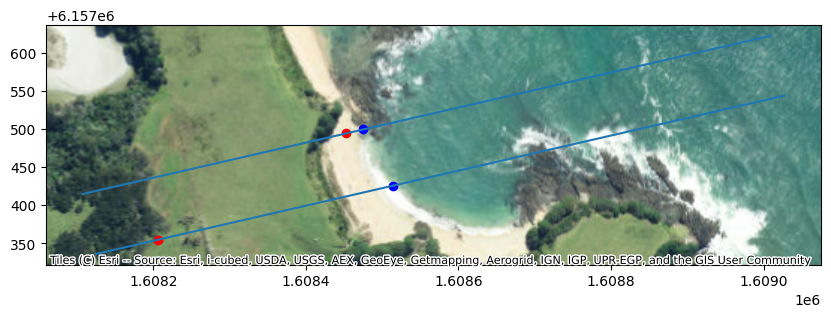

In [13]:
ax = site.plot(figsize=(10,10))
gpd.GeoSeries(points_2005, crs=2193).plot(ax=ax, color="blue")
gpd.GeoSeries(points_2100, crs=2193).plot(ax=ax, color="red")
ctx.add_basemap(ax, crs=site.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

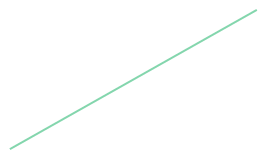

In [14]:
line = LineString(points_2100)
line

In [15]:
ocean_points = [Point(p) for p in site.geometry.apply(lambda transect: transect.coords[-1])]
ocean_points

[<POINT (1609010.997 6157622.544)>, <POINT (1609029.1 6157544.1)>]

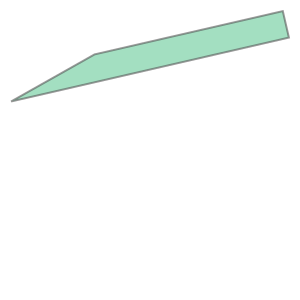

In [16]:
polygon = Polygon(points_2100 + ocean_points[::-1])
polygon

In [17]:
gpd.GeoSeries(line, crs=2193).to_crs(4236).to_file("bruun_line.geojson")
gpd.GeoSeries(polygon, crs=2193).to_crs(4236).to_file("bruun_polygon.geojson")